# The Sparks Foundation - Intership


Data Science & Business Analytic

# Prediction using Unsupervised ML

* From the given "Iris" dataset, predict the optimum number of clusters and represent it visually
* Data can be found at https://bit.ly/3kXTdox

Author - kartik Verma

# # Importing some useful libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the dataset
from sklearn.datasets import load_iris
data = load_iris()
df_iris = pd.DataFrame(data.data,columns=data.feature_names)
# df_iris["target"] = data.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# df_iris.target.replace({0:"Setosa",1:"Versicolour",2:"Virginica"},inplace=True)

In [4]:
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
82,5.8,2.7,3.9,1.2
54,6.5,2.8,4.6,1.5
86,6.7,3.1,4.7,1.5
134,6.1,2.6,5.6,1.4
135,7.7,3.0,6.1,2.3


# Data Pre-processing

In [5]:
df_iris.shape

(150, 4)

* statistical summary of Data Frame

In [6]:
df_iris.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
(df_iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


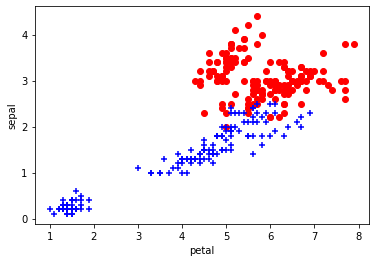

In [19]:
plt.scatter(df_iris["sepal length (cm)"],df_iris["sepal width (cm)"],c="red")
plt.scatter(df_iris["petal length (cm)"],df_iris["petal width (cm)"],c="blue",marker="+")
 
plt.xlabel("petal")
plt.ylabel("sepal")
plt.show()

In [8]:
df_iris_dataset = df_iris
df_iris_x = df_iris.iloc[:,0:4].values
df_iris_x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

<AxesSubplot:>

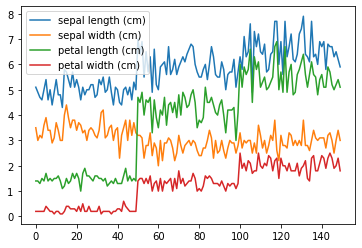

In [9]:
df_iris_dataset.plot(kind ="line")

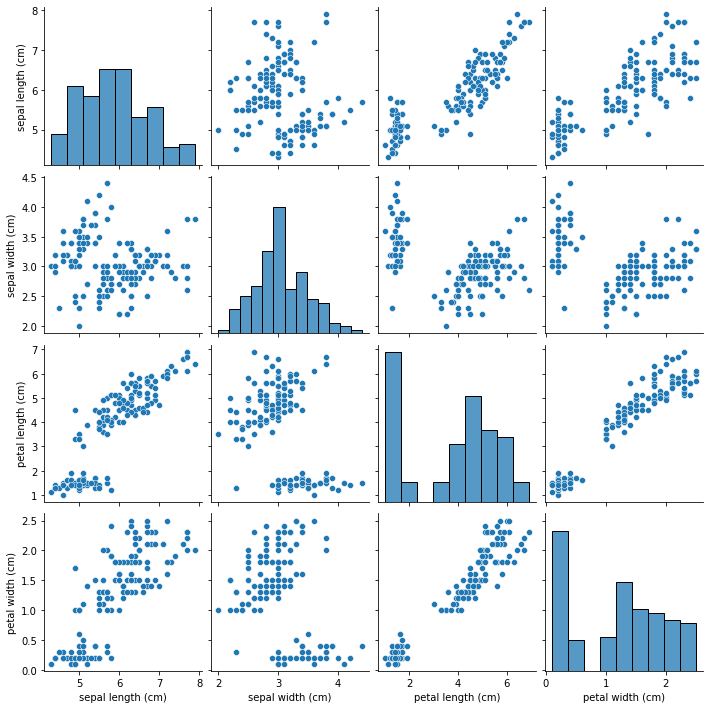

In [10]:
sns.pairplot(data = df_iris_dataset)

In [20]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df_iris)

* Ploting elbow curve or sree to find the no. of cluster


In [21]:
from sklearn.cluster import KMeans
cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]

,num_cluster,cluster_errors
0,1,600.000000
1,2,222.361705
2,3,139.820496
3,4,114.092547
4,5,90.807283
5,6,80.022496
6,7,71.047810
7,8,62.510860
8,9,54.760704
9,10,47.449943


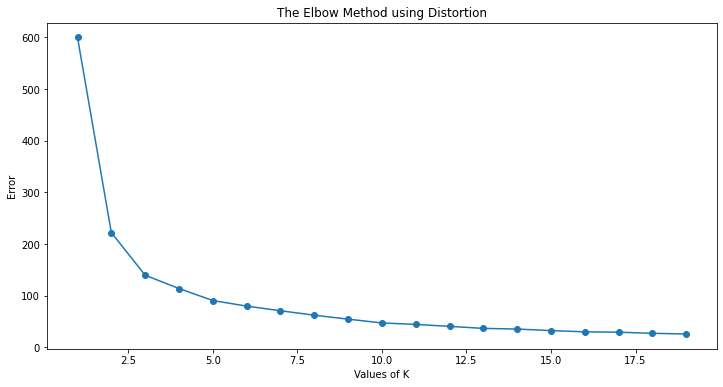

In [22]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o') 
plt.xlabel('Values of K') 
plt.ylabel('Error') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


* now we see elbow is in between 2.5 to 5 so we can guess number of cluster should be 3

# creating model and fitting it

In [28]:
model = KMeans(n_clusters=3,max_iter=25)
df_iris["clusterId"]=model.fit_predict(df_iris)

In [27]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [32]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

* analysis of cluster found

In [35]:
df = pd.DataFrame(model.cluster_centers_,columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


In [30]:
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusterId
74,6.4,2.9,4.3,1.3,0
4,5.0,3.6,1.4,0.2,1
36,5.5,3.5,1.3,0.2,1
118,7.7,2.6,6.9,2.3,2
41,4.5,2.3,1.3,0.3,1


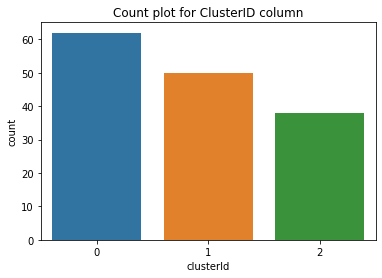

In [31]:
sns.countplot(x=df_iris.clusterId)
plt.title('Count plot for ClusterID column')
plt.show()

# Scatter plot to visualize the clusters

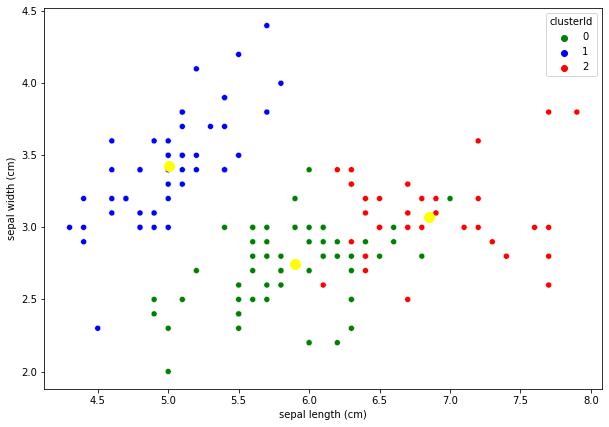

In [45]:

plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue=df_iris.clusterId ,data=df_iris, palette=['green','blue','red'])

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()

# Thank you 
april/6/2022